<a href="https://colab.research.google.com/github/Mateus-Maciel/projetos-1-/blob/main/Pisa_Perfomance_Scores_by_Country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [31]:
arq = files.upload()
path = list(arq.keys())[0]
data = pd.read_csv(path)
data.head()

Saving OECD PISA data.csv to OECD PISA data.csv


,index,LOCATION,INDICATOR,SUBJECT,TIME,Value
0,0,AUS,PISAMATH,BOY,2003,527.000
1,1,AUS,PISAMATH,BOY,2006,527.000
2,2,AUS,PISAMATH,BOY,2009,519.000
3,3,AUS,PISAMATH,BOY,2012,510.115
4,4,AUS,PISAMATH,BOY,2015,497.000


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 0 to 2086
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      2087 non-null   int64  
 1   LOCATION   2087 non-null   object 
 2   INDICATOR  2087 non-null   object 
 3   SUBJECT    2087 non-null   object 
 4   TIME       2087 non-null   int64  
 5   Value      2087 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 98.0+ KB


In [33]:
data.drop(columns="index",inplace=True)

In [34]:
data.rename(columns={"Value" : "Value"},inplace=True)

In [35]:
data.isna().sum()

LOCATION     0
INDICATOR    0
SUBJECT      0
TIME         0
Value        0
dtype: int64

In [36]:
data.duplicated().sum()

0

In [37]:
data.LOCATION.value_counts()

AUS     54
IRL     54
SWE     54
BRA     54
PRT     54
POL     54
NOR     54
NZL     54
IDN     54
MEX     54
KOR     54
JPN     54
ITA     54
ISL     54
HUN     54
GRC     54
DEU     54
FRA     54
FIN     54
DNK     54
CZE     54
CAN     54
BEL     54
CHE     54
LUX     53
TUR     51
USA     51
SVK     51
ESP     51
NLD     51
OAVG    49
CHL     48
ISR     48
RUS     47
SVN     45
GBR     45
EST     45
AUT     45
LVA     30
COL     18
SGP      9
HKG      9
PER      9
TWN      9
MAC      9
CRI      9
LTU      9
Name: LOCATION, dtype: int64

In [38]:
data.head(1)

,LOCATION,INDICATOR,SUBJECT,TIME,Value
0,AUS,PISAMATH,BOY,2003,527.0


In [43]:
print(data.columns)

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'TIME', 'Value'], dtype='object')


In [44]:
Countries_comparing = data.pivot_table(index = ['LOCATION'],aggfunc=np.sum , columns = 'TIME', values = 'Value', margins = True)
Countries_comparing.sort_values(by = 'All', inplace = True, ascending=False)

In [45]:
Countries_comparing.head(10)

TIME,2000,2003,2006,2009,2012,2015,2018,All
LOCATION,,,,,,,,
All,46186.38,96637.866,163450.49,164339.176,169509.544,196932.0,180659.0,1017714.456
FIN,1637.00,3262.000,4975.00,4891.000,4766.619,4707.0,4648.0,28886.619
KOR,1577.00,3228.000,4877.00,4872.000,4882.817,4675.0,4678.0,28789.817
JPN,1566.00,3097.000,4657.00,4766.000,4863.143,4759.0,4680.0,28388.143
CAN,1604.00,3191.000,4764.00,4740.000,4699.273,4711.0,4651.0,28360.273
NZL,1589.00,3135.000,4718.00,4717.000,4583.471,4553.0,4525.0,27820.471
AUS,1587.00,3149.000,4681.00,4668.000,4612.420,4521.0,4491.0,27709.420
CHE,1484.00,3078.000,4622.00,4653.000,4665.566,4556.0,4484.0,27542.566
IRL,1582.00,3054.000,4580.00,4472.000,4639.504,4582.0,4542.0,27451.504


In [48]:
gender_comparing = data.pivot_table(index=["SUBJECT","INDICATOR"],values="Value")
gender_comparing.reset_index(inplace=True)
gender_comparing

,SUBJECT,INDICATOR,Value
0,BOY,PISAMATH,491.511651
1,BOY,PISAREAD,469.715347
2,BOY,PISASCIENCE,490.949764
3,GIRL,PISAMATH,482.384310
4,GIRL,PISAREAD,502.906630
5,GIRL,PISASCIENCE,489.957950
6,TOT,PISAMATH,486.792373
7,TOT,PISAREAD,485.866920
8,TOT,PISASCIENCE,490.480198


<Axes: xlabel='SUBJECT', ylabel='Value'>

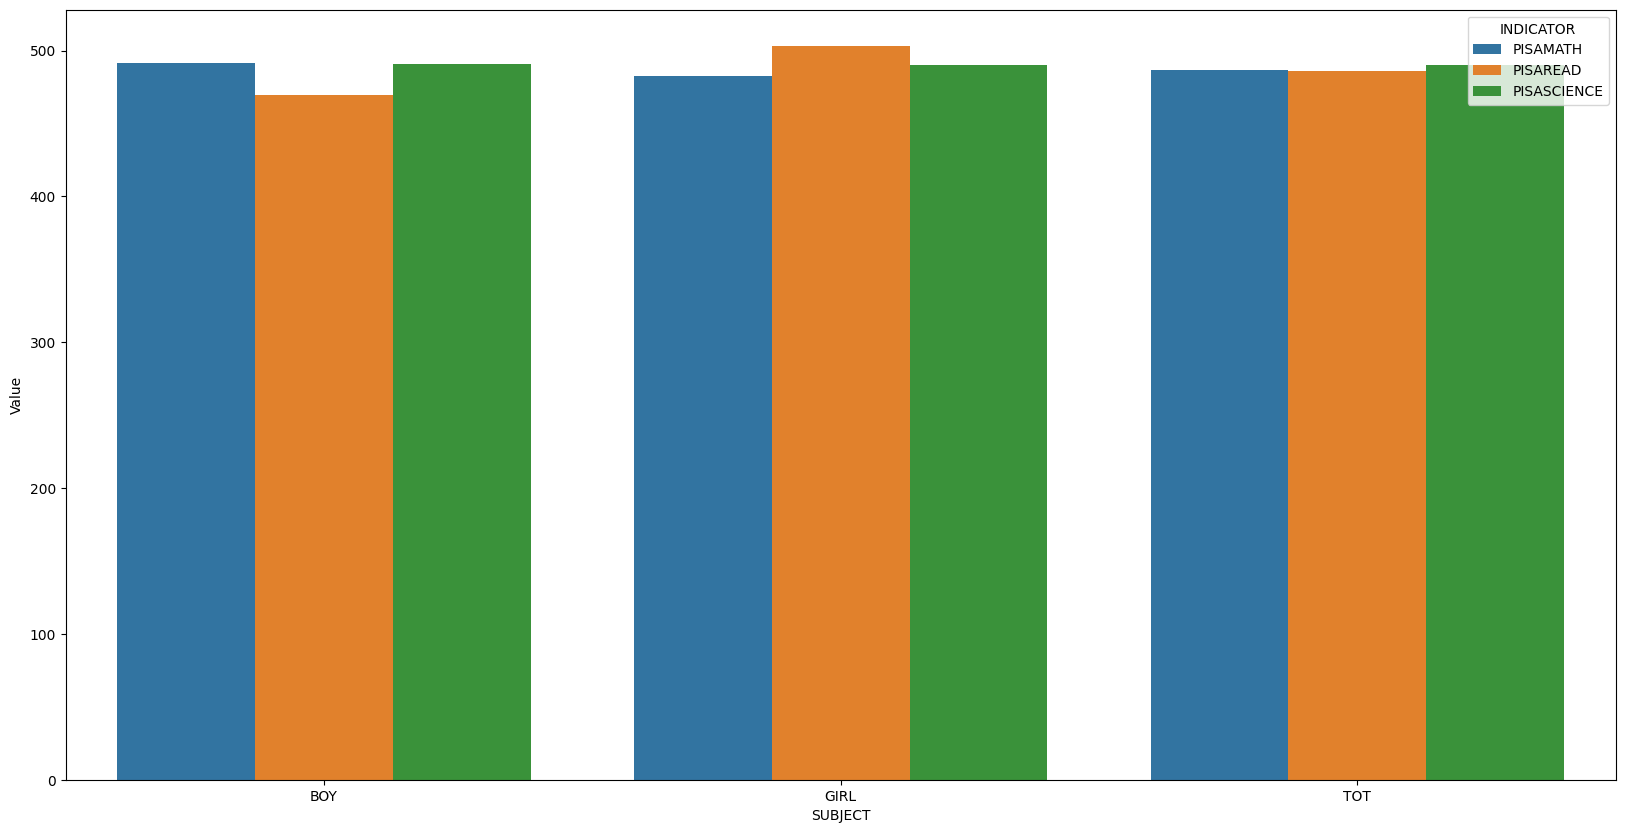

In [49]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data = gender_comparing, x = 'SUBJECT', y = 'Value', hue = 'INDICATOR', )